# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [151]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url='http://api.openweathermap.org/data/2.5/weather?'

# Set parameter
units='metric'

# Build URL template:
url_template = f'{url}q={{}}&appid={weather_api_key}&units={units}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url_template.format(city, weather_api_key)
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jiancheng
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 6 of Set 1 | cumaribo
City not found. Skipping...
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | xiaoweizhai
Processing Record 12 of Set 1 | sao filipe
Processing Record 13 of Set 1 | quang ngai
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | berlevag
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | luderitz
Processing Record 2

Processing Record 31 of Set 4 | bitung
Processing Record 32 of Set 4 | la ronge
Processing Record 33 of Set 4 | pasni
Processing Record 34 of Set 4 | samarai
Processing Record 35 of Set 4 | pa sang
Processing Record 36 of Set 4 | general roca
Processing Record 37 of Set 4 | thompson
Processing Record 38 of Set 4 | mahebourg
Processing Record 39 of Set 4 | akyab
Processing Record 40 of Set 4 | kamenka
Processing Record 41 of Set 4 | manama
Processing Record 42 of Set 4 | kuche
City not found. Skipping...
Processing Record 43 of Set 4 | wellington
Processing Record 44 of Set 4 | vostok
Processing Record 45 of Set 4 | babu
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | tahe
Processing Record 48 of Set 4 | gisborne
Processing Record 49 of Set 4 | bengkulu
Processing Record 0 of Set 5 | sao joao da barra
Processing Record 1 of Set 5 | kaka
Processing Record 2 of Set 5 | carutapera
Processing Record 3 of Set 5 | tagusao
Processing Record 4 of Set 5 | cherskiy
Process

Processing Record 22 of Set 8 | blagoyevo
Processing Record 23 of Set 8 | vila franca do campo
Processing Record 24 of Set 8 | linxia
Processing Record 25 of Set 8 | linda
Processing Record 26 of Set 8 | yatou
Processing Record 27 of Set 8 | zyryanka
Processing Record 28 of Set 8 | vanimo
Processing Record 29 of Set 8 | namatanai
Processing Record 30 of Set 8 | mankono
Processing Record 31 of Set 8 | bud
Processing Record 32 of Set 8 | touros
Processing Record 33 of Set 8 | stornoway
Processing Record 34 of Set 8 | malwan
City not found. Skipping...
Processing Record 35 of Set 8 | kununurra
Processing Record 36 of Set 8 | perth
Processing Record 37 of Set 8 | fougamou
Processing Record 38 of Set 8 | banepa
Processing Record 39 of Set 8 | ternate
Processing Record 40 of Set 8 | zhigansk
Processing Record 41 of Set 8 | umm durman
City not found. Skipping...
Processing Record 42 of Set 8 | west wendover
Processing Record 43 of Set 8 | mukhen
Processing Record 44 of Set 8 | tosya
Processin

Processing Record 9 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 10 of Set 12 | basco
Processing Record 11 of Set 12 | kidal
Processing Record 12 of Set 12 | klichka
Processing Record 13 of Set 12 | whitecourt
Processing Record 14 of Set 12 | zhob
Processing Record 15 of Set 12 | pimentel
Processing Record 16 of Set 12 | lucea
Processing Record 17 of Set 12 | enid
Processing Record 18 of Set 12 | arlit
Processing Record 19 of Set 12 | constantine
Processing Record 20 of Set 12 | taoudenni
Processing Record 21 of Set 12 | mount gambier
Processing Record 22 of Set 12 | abu samrah
Processing Record 23 of Set 12 | muros
Processing Record 24 of Set 12 | havoysund
Processing Record 25 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 26 of Set 12 | mosetse
Processing Record 27 of Set 12 | nelson bay
Processing Record 28 of Set 12 | yuli
Processing Record 29 of Set 12 | katunino
Processing Record 30 of Set 12 | nhulunbuy
Processing Record 31 of Set 12 | t

In [152]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [153]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jiancheng,30.3910,104.5491,13.18,80,60,1.88,CN,1680989598
1,tasiilaq,65.6145,-37.6368,1.73,89,100,10.62,GL,1680989598
2,mataura,-46.1927,168.8643,9.15,68,74,2.38,NZ,1680989598
3,mar del plata,-38.0023,-57.5575,23.38,81,0,6.71,AR,1680989598
4,albany,42.6001,-73.9662,11.00,22,35,0.89,US,1680989588


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jiancheng,30.3910,104.5491,13.18,80,60,1.88,CN,1680989598
1,tasiilaq,65.6145,-37.6368,1.73,89,100,10.62,GL,1680989598
2,mataura,-46.1927,168.8643,9.15,68,74,2.38,NZ,1680989598
3,mar del plata,-38.0023,-57.5575,23.38,81,0,6.71,AR,1680989598
4,albany,42.6001,-73.9662,11.00,22,35,0.89,US,1680989588


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

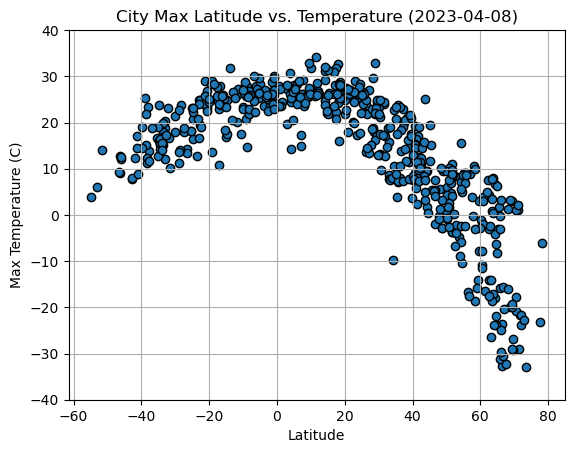

In [157]:
# Build scatter plot for latitude vs. temperature (Converted to Celsius)
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (" + time.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.yticks(range(-40, 50, 10))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

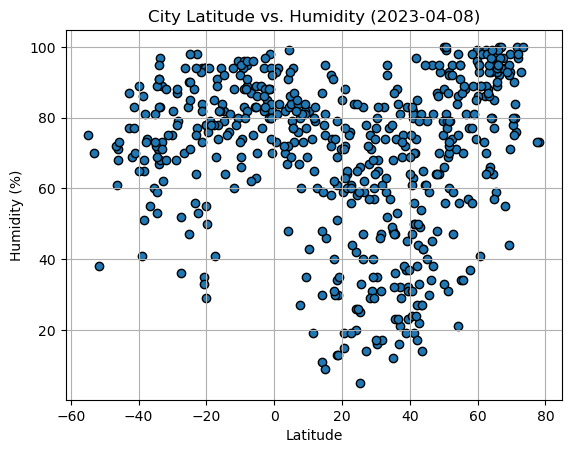

<Figure size 640x480 with 0 Axes>

In [158]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + time.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

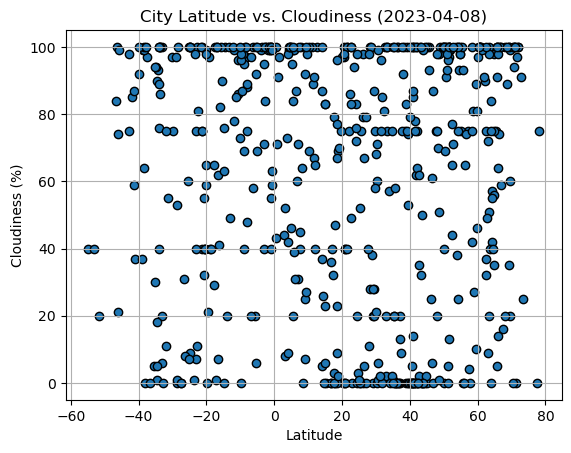

In [159]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + time.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

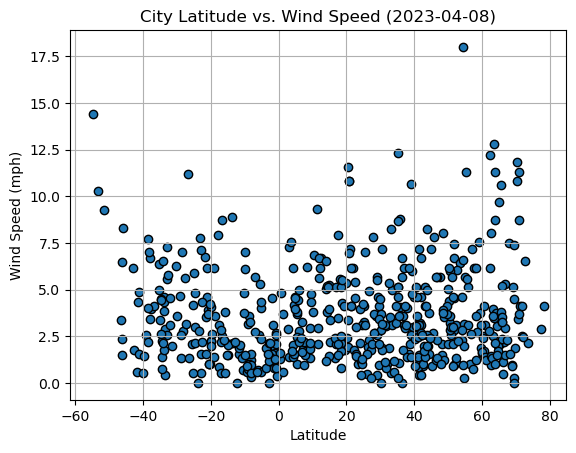

In [160]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + time.strftime("%Y-%m-%d") + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [161]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

    # Calculate the coefficient of determination (R-squared)
    r_squared = r_value ** 2
    
    # Calculate regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation and r-value
    plt.annotate(line_eq, (text_coordinates[0], text_coordinates[1]+5), fontsize=15, color="red")
    plt.annotate(f"r-value: {round(r_squared, 2)}", (text_coordinates[0], text_coordinates[1]-15), fontsize=15, color="red")

    # Add labels and title
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)   
    # Print the r-value
    print(f"The r-value is: {round(r_squared, 2)}")



In [162]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jiancheng,30.3910,104.5491,13.18,80,60,1.88,CN,1680989598
1,tasiilaq,65.6145,-37.6368,1.73,89,100,10.62,GL,1680989598
4,albany,42.6001,-73.9662,11.00,22,35,0.89,US,1680989588
5,provideniya,64.3833,-173.3000,-17.98,80,42,3.03,RU,1680989599
8,xiaoweizhai,26.1903,107.5125,13.63,83,98,0.49,CN,1680989599


In [163]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,mataura,-46.1927,168.8643,9.15,68,74,2.38,NZ,1680989598
3,mar del plata,-38.0023,-57.5575,23.38,81,0,6.71,AR,1680989598
6,ushuaia,-54.8000,-68.3000,3.81,75,40,14.40,AR,1680989599
7,vaini,-21.2000,-175.2000,29.09,84,40,4.63,TO,1680989599
12,tuatapere,-46.1333,167.6833,12.07,71,21,1.51,NZ,1680989599


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.73


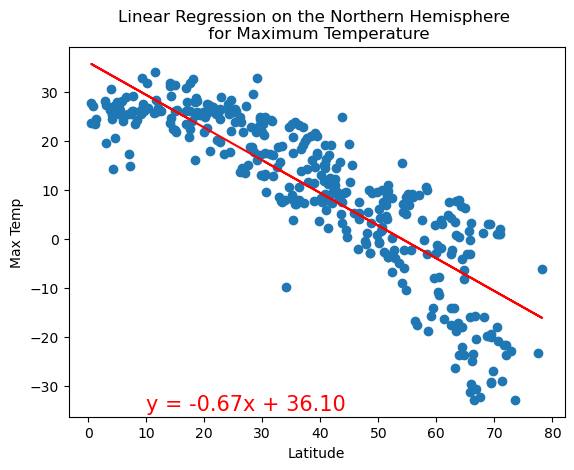

In [164]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", "Max Temp", (10,-40))
# Show the plot
plt.show()



The r-value is: 0.58


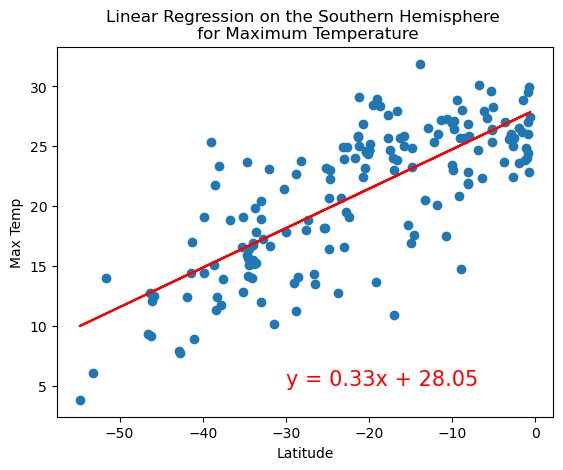

In [165]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp", (-30,0))

# Show the plot
plt.show()


**Discussion about the linear relationship:**


On the first graph for the northern hemisphere, it shows a strong negative coorelation between the temperature and latitude. This suggests the higher latitude, the colder it would be which would make sense.

On the second graph for the southern hemisphere, it shows a somewhat positive coorelation between the temperature and latitude. This agrees with the data in the first graph as this shows the closer to 0 in latitude, generally the warmer the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07


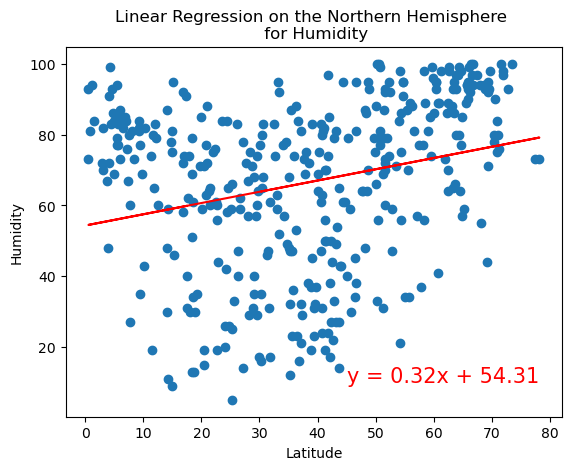

In [166]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Linear Regression on the Northern Hemisphere \n for Humidity", "Humidity", (45,5))
# Show the plot
plt.show()


The r-value is: 0.11


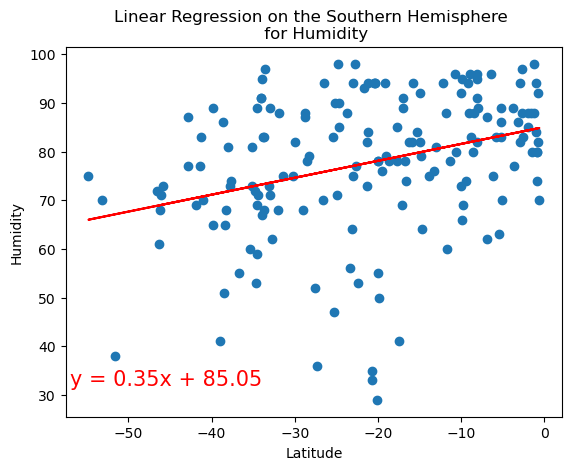

In [167]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Linear Regression on the Southern Hemisphere \n for Humidity", "Humidity", (-57,27))
# Show the plot
plt.show()


**Discussion about the linear relationship:**

On the first graph that shows humidity vs latitude for the northern hemisphere, there a very weak coorelation with the data.

On the second graph for the southern hemisphere, the same can be said. There are many factors that can influence humidity such as weather patterns, seasons, and proximity to bodies of water.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01


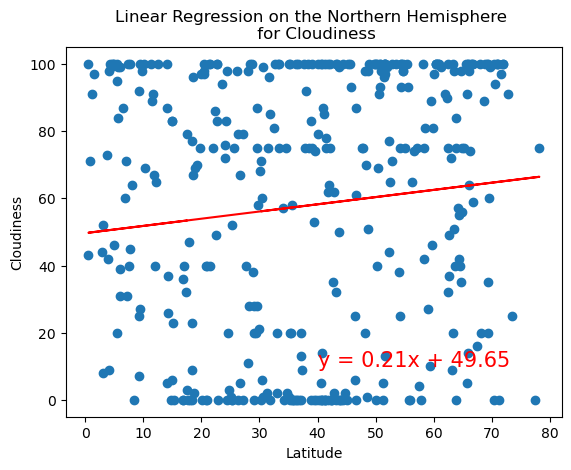

In [168]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                        "Linear Regression on the Northern Hemisphere \n for Cloudiness", "Cloudiness", (40,5))
# Show the plot
plt.show()


The r-value is: 0.04


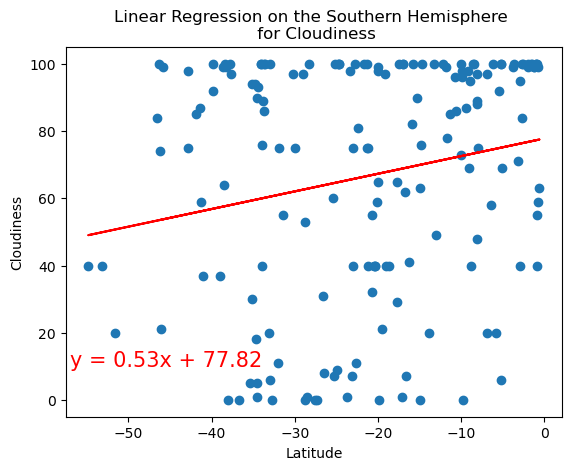

In [169]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Linear Regression on the Southern Hemisphere \n for Cloudiness", "Cloudiness", (-57,5))
# Show the plot
plt.show()


**Discussion about the linear relationship:**

On the first graph that shows cloudiness vs latitude in the northern hemisphere, there is a very weak coorelation with this data

On the second graph for the southern hemisphere, the same can be said. This would suggest there is no clear relationship beween the two however there may be other factors to consider such as closeness to water and wind.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0


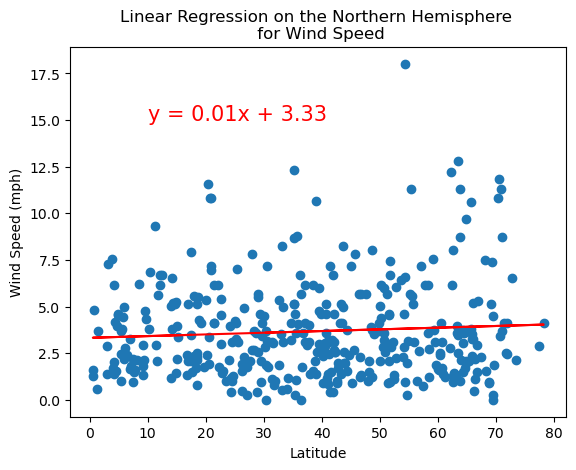

In [170]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed", "Wind Speed (mph)", (10,10))
# Show the plot
plt.show()


The r-value is: 0.18


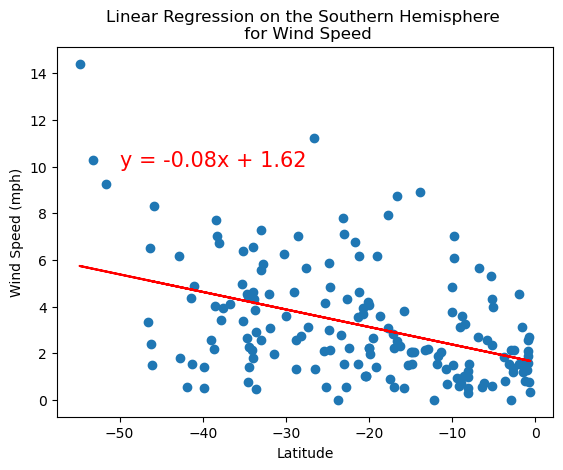

In [171]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", "Wind Speed (mph)", (-50,5))
# Show the plot
plt.show()

**Discussion about the linear relationship:** 

On the first graph that shows wind speed vs the latitude on the northern hemisphere, there is no coorelation,

On the second graph for the southern hemisphere there is a weak coorelation. There can be many factors that can influence wind speed such as topography.